### 遥感影像光谱指数地物提取，以基于MNDWI指数值的水体提取为例。

1. mndwi指数值计算。

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_img = 'data/data-section-5/subset_1.tif'


In [3]:
rsimg = rasterio.open(path_img)
rsimg_arr = rsimg.read()
print(rsimg_arr.dtype)   ## 无符号整型，没有负数。但指数值一般是有负数的，因此先进行数据类型转换。
rsimg_arr = np.int16(rsimg_arr)   

uint16


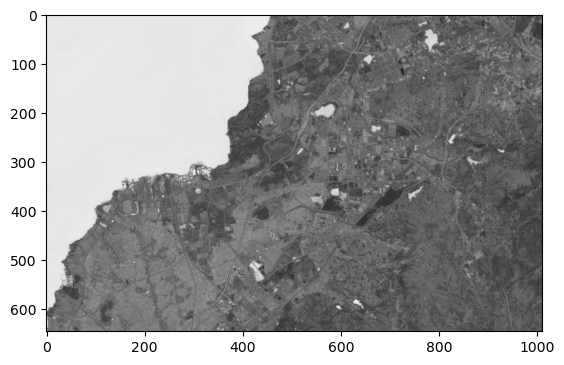

In [4]:
mndwi = (rsimg_arr[1]-rsimg_arr[4])/(rsimg_arr[1]+rsimg_arr[4])
plt.imshow(mndwi, cmap='gray')


2. 直方图统计

(652095,)


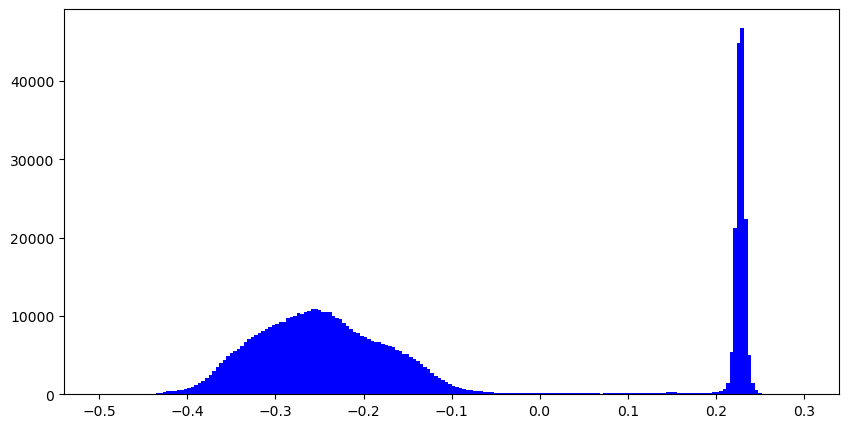

In [12]:
mndwi_1d = mndwi.flatten()
print(mndwi_1d.shape)
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(mndwi_1d, bins=200, facecolor='blue', range=[-0.5, 0.3]);


3. 二值分割

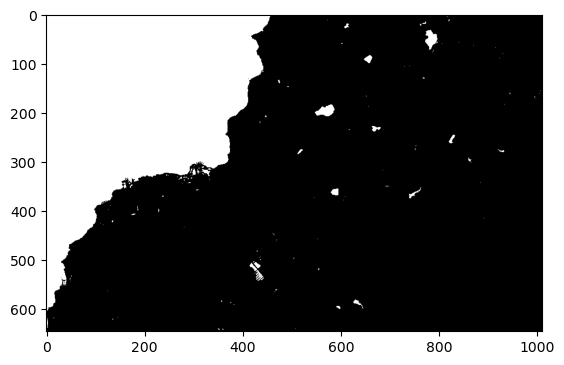

In [15]:
mndwi_seg = mndwi.copy()
mndwi_seg[mndwi_seg>0.1]=1
mndwi_seg[mndwi_seg<=0.1]=0
plt.imshow(mndwi_seg, cmap='gray')

4. 写出二值分割结果

In [28]:
rsimg.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1011,
 'height': 645,
 'count': 6,
 'crs': CRS.from_epsg(32648),
 'transform': Affine(20.0, 0.0, 265580.0,
        0.0, -20.0, 2748540.0)}

In [29]:
path_band1 = 'data/data-section-5/subset_1_mndwi_seg_python.tif'
with rasterio.open(path_band1, 'w', driver=rsimg.driver, 
                   height=rsimg.height,
                   width=rsimg.width,
                   count=1,
                   dtype=np.float32,
                   crs=rsimg.crs,
                   transform=rsimg.transform) as dst:
  dst.write(mndwi_seg, 1)   ## the number 1 is the number of bands.
